Progetto: Stimare il valore di appartamenti in California
===========================================

Il modello risultante sarà utilizzato per alimentare un successivo sistema che da delle indicazioni di investimento immobiliare.

Seleziona misura di performance => Errore quadratico medio, Root Mean Square Error
Overview dei dati

Esempio
https://github.com/ageron/handson-ml2/blob/master/02_end_to_end_machine_learning_project.ipynb

In [2]:
# Pandas, already known
import pandas as pd

# To interact with files
import os

# Python library to chart data.
import matplotlib.pyplot as plt

# Python library for math computations.
import numpy as np

# Pandas module for scatter matrix.
from pandas.plotting import scatter_matrix


## Dizionario dei dati
* `longitude`, `latitude` => posizione del distretto
* `housing_median_age` => età media degli immobli nel distretto
* `total_rooms`, `total_bedrooms` => numero totale di stanze e di camere da letto nel distretto
* `population` => popolazione del distretto
* `households` => numero di immobili
* `median_income` => reddito medio / 10000 (es: 0,5 = 5000 USD, 12.5 = 12500 USD), limitato all'intervallo 0.5 - 15.0 circa, della popolazione del distretto
* `median_house_value` => valore medio delle case nel territorio
* `ocean_proximity` => se vicino al mare o no

In [4]:
# Load the california-housing-prices.csv into a Pandas dataset.
def load_housing_data():
    
    # this is a way to "build" a relative path using the 'os' module.
    csv_path = os.path.join("datasets", "california-housing-prices.csv")
    
    # return the dataframe
    return pd.read_csv(csv_path)

housing = load_housing_data()

## Esplorare i dati

In [5]:
# let's give a look to the data.
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [7]:
housing.info()
# notare che circa 200 righe non hanno la feature "total_bedrooms"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [10]:
# what are the values for "ocean_proximity" ?
housing["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [11]:
# what are the values for "ocean_proximity" and how many rows have that value ?
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
# overview of numeric features
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002724292B488>,
      dtype=object)

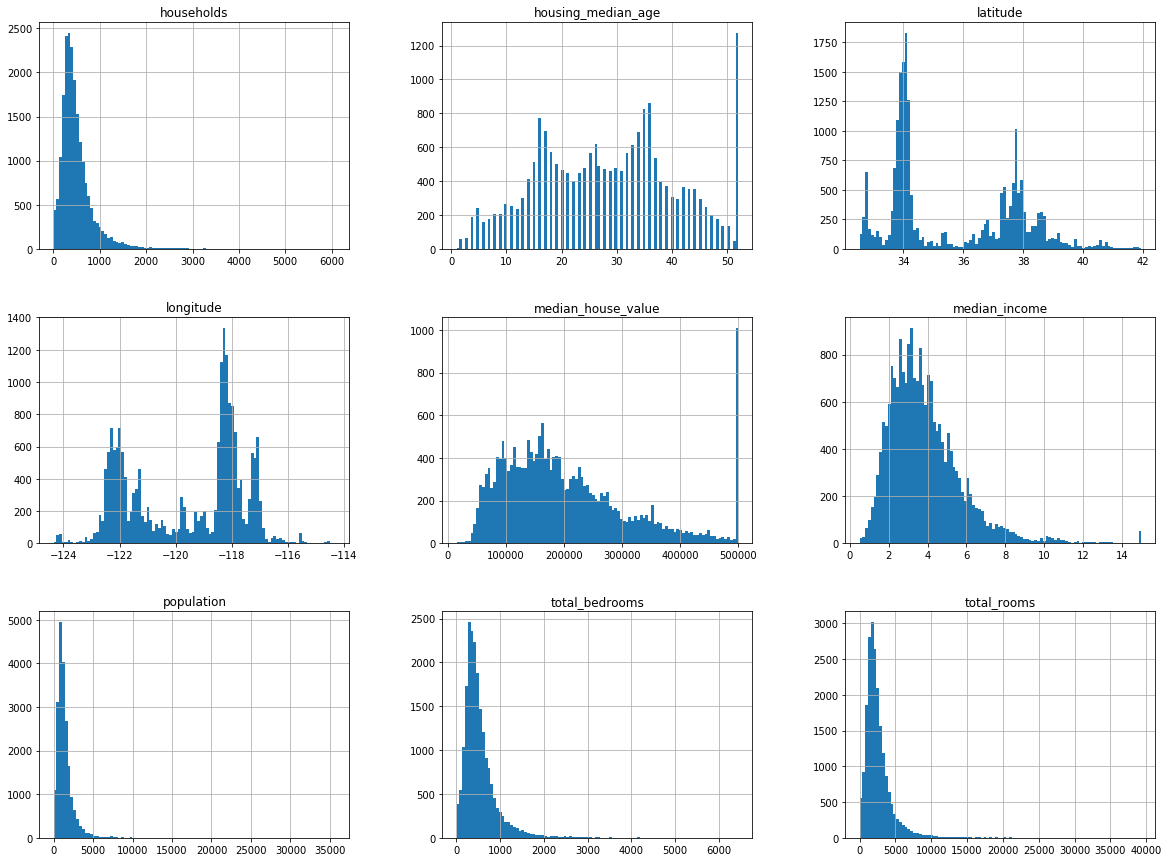

In [12]:
# Istogram view of the rows
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html
housing.hist(bins=100, figsize=(20,15))

In [14]:
# suddivisione randomica dei dati in set di training e set di test
def split_train_test(data, test_ratio):
    
    # crea un array con i numeri 1, 2... fino alla lunghezza dei dati, in cui i numeri appaiono in ordine casuale
    # es:  [34, 12, 92, 1, ...] 
    shuffled_indices = np.random.permutation( len(data) )
    
    # calcola la dimensione dei dati di test come percentuale di tutti i dati
    test_set_size = int(len(data) * test_ratio)
    
    # estrae i numeri disordinati presenti nelle posizioni [0 - test_set_size)
    test_indices = shuffled_indices[:test_set_size]
    
    # estrae i numeri disordinati presenti nelle posizioni [test_set_size, fine]
    train_indices = shuffled_indices[test_set_size:]
    
    # restituisce due data frame
    # 1. con i dati i cui indici sono negli indici di training
    # 2. con i dati i cui indici sono negli indici di test
    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = split_train_test(housing, 0.2)

In [15]:
len(train_set)

16512

In [16]:
len(test_set)

4128

<img src="https://www.freeworldmaps.net/united-states/california/california-counties-map.jpg" width="500"/>



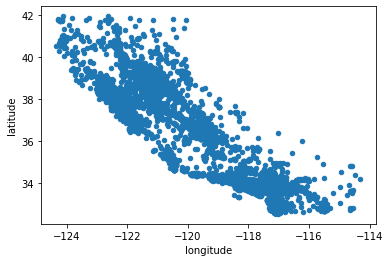

In [20]:
# let's chart the data using "longitude" as x, "latitude" as y.
train_set.plot(kind="scatter", x="longitude", y="latitude")

## A note on representing a color of a pixel with 4 numbers: RGBA
![Sidenote on RGBA](http://www.iconconstructor.com/tutorials/what_is_icon/rgba_format_scheme.jpg)

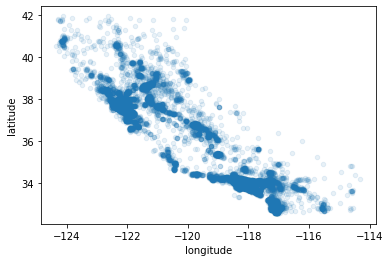

In [19]:
# let's give the points some transaprency through an explicit alpha channel value.
train_set.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

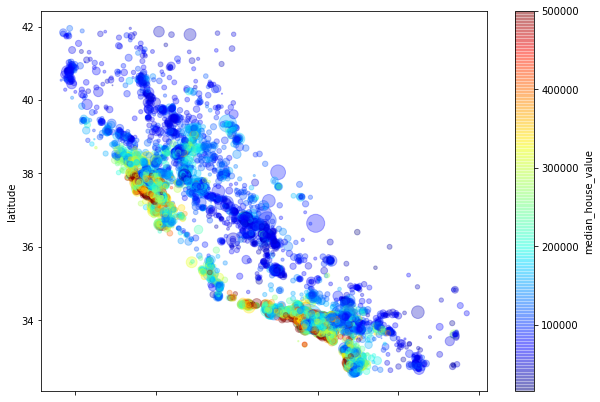

In [25]:
train_set.plot(
    kind="scatter", 
    x="longitude", 
    y="latitude", 
    alpha=0.3, 
    s=housing["population"]/50, # size of a dot, dpenes on population. The more population, the bigger the dot.
    c="median_house_value", # color of a dot, depending on the median house value.
    cmap=plt.get_cmap("jet"),  # color map, from blue (low values) to red (high values)
    figsize=(10,7), # picture dimension
    colorbar=True # wheter to include the legend
)


## Correlation

!["Correlation"](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/800px-Correlation_examples2.svg.png)

In [24]:
# Let's give a look to the interdependencies of data through "correlation".
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027246933108>,
      dtype=object)

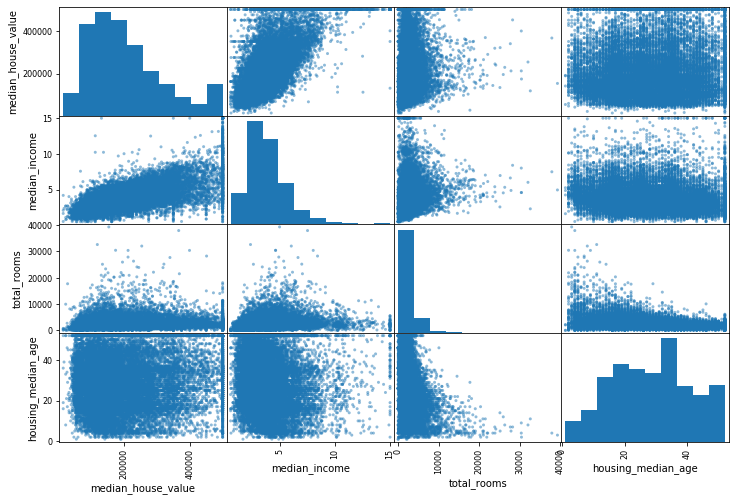

In [27]:
attributes = [
    "median_house_value", 
    "median_income", 
    "total_rooms",
    "housing_median_age"]



# function from pandas.plotting
scatter_matrix(
    housing[attributes], # just the specified series
    figsize=(12, 8)
)

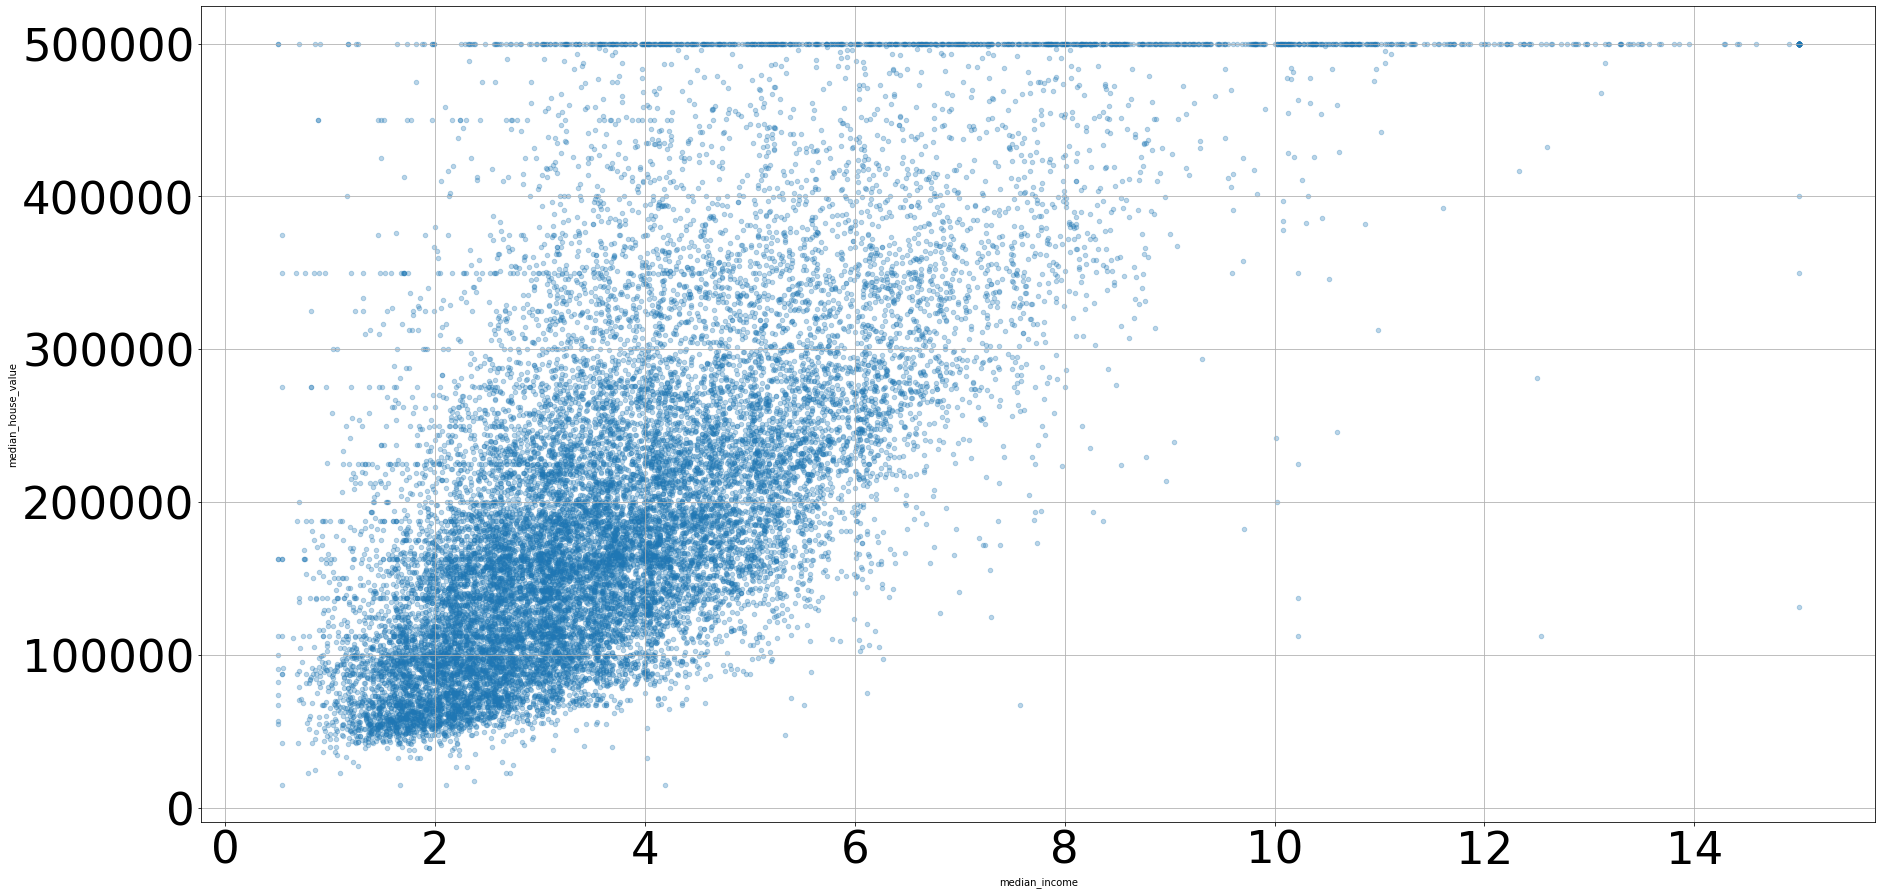

In [32]:
# Zoom su "median_income / median_house_value" e...
housing.plot(
    kind="scatter", 
    x="median_income", 
    y="median_house_value", 
    alpha=0.3, 
    figsize=(30,15), 
    grid=True, # a grid
    fontsize=45)

In [37]:
# Proviamo con parametri calcolati che potrebbero essere più significativi, aggiungendo nuove colonne "calcolate" al dataset.

# numero medio di stanze per immobile
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]

# percentuale di camere da letto sul totale di camere 
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]

# numero di persone per immobile, potrebbe indicare i distreti più o meno densamente popolosi
housing["population_per_household"]=housing["population"]/housing["households"]

housing.corr()["median_house_value"][ ["rooms_per_household","bedrooms_per_room","population_per_household"] ].sort_values(ascending=False)

rooms_per_household         0.151948
population_per_household   -0.023737
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027248D6EF88>,
      dtype=object)

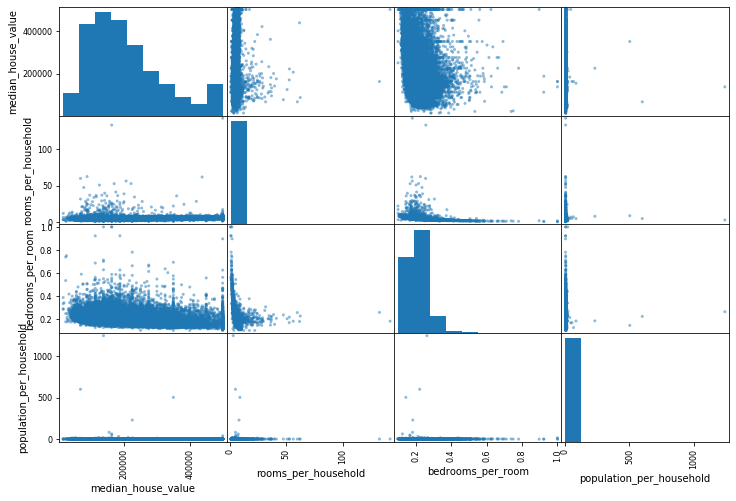

In [38]:
attributes = ["median_house_value", "rooms_per_household", "bedrooms_per_room",
              "population_per_household"]
scatter_matrix(
    housing[attributes], 
    figsize=(12, 8)
)

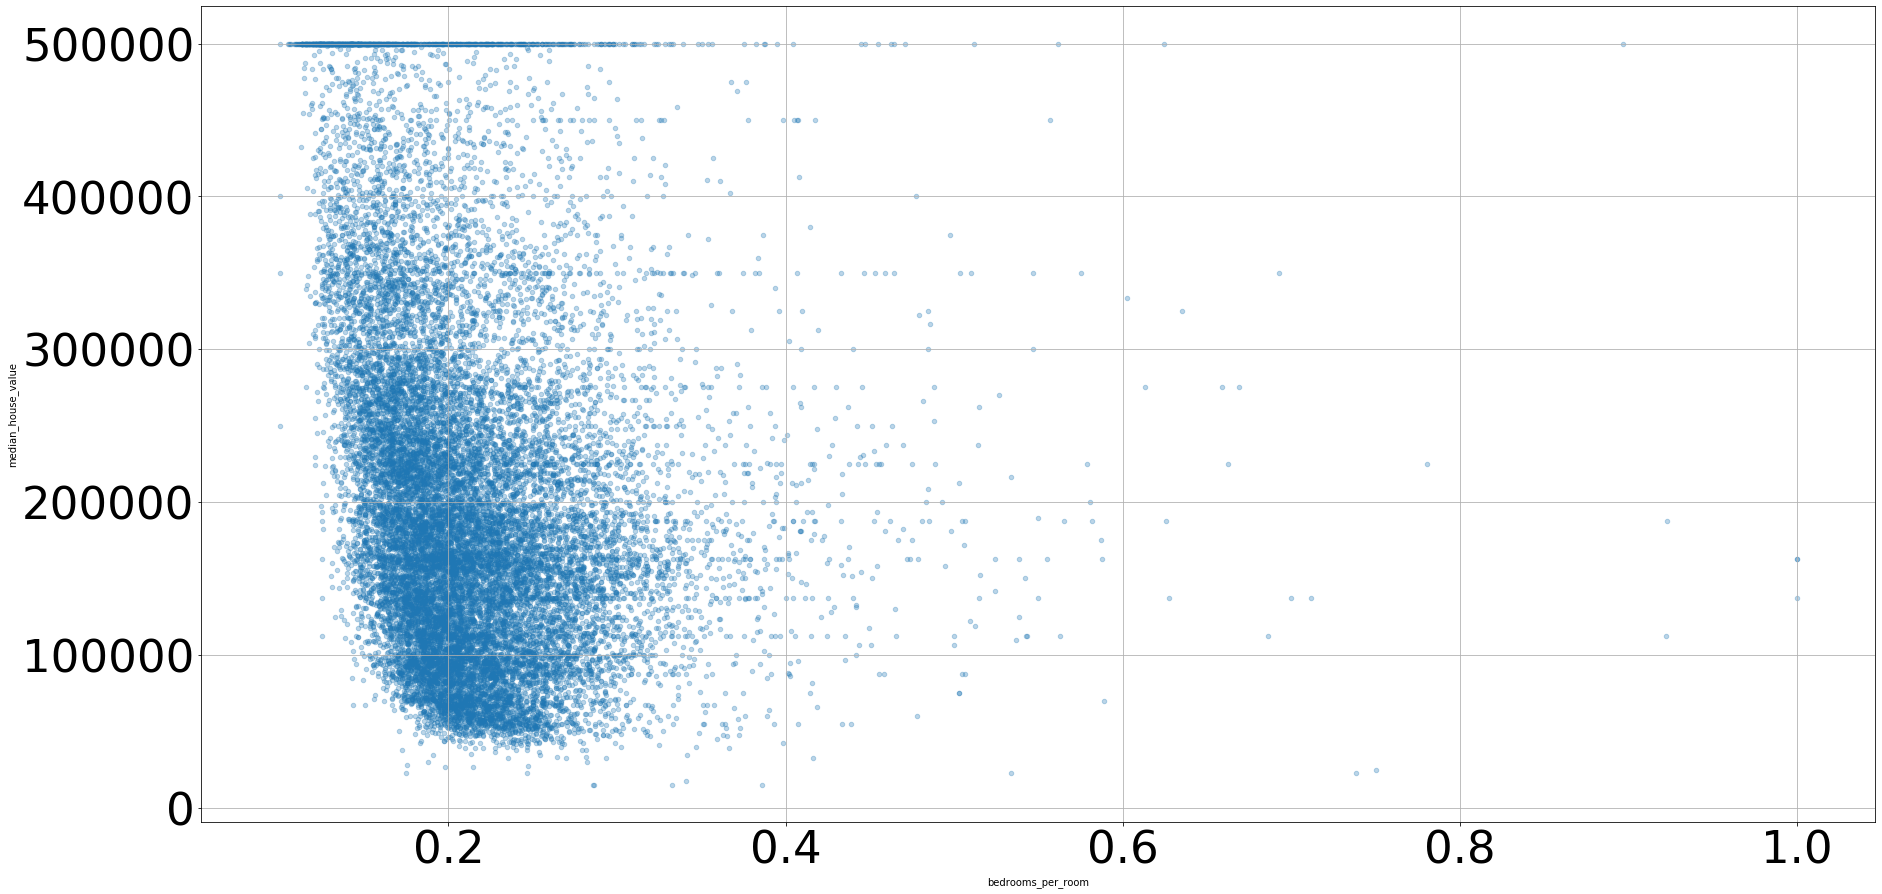

In [39]:
# Zoom su "median_income / median_house_value" e...
housing.plot(
    kind="scatter", 
    x="bedrooms_per_room", 
    y="median_house_value", 
    alpha=0.3, 
    figsize=(30,15), 
    grid=True, # a grid
    fontsize=45)

# Preparare i dati per il Machine Learning

In [40]:
# check total_bedrooms count. It is not the same that other fields. So some data is missing there
train_set.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16512.000000,16512.000000,16512.00000,16512.000000,16351.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.566608,35.632954,28.65413,2626.057473,536.265183,1418.336604,498.177689,3.868999,206606.574673
std,2.003822,2.134670,12.59871,2170.396967,418.755398,1090.469547,380.619068,1.888176,115459.050103
min,-124.350000,32.540000,1.00000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.00000,1449.000000,296.000000,788.000000,279.000000,2.566100,119600.000000
50%,-118.490000,34.260000,29.00000,2127.000000,434.000000,1164.000000,409.000000,3.536000,179100.000000
75%,-118.000000,37.720000,37.00000,3119.000000,645.000000,1721.250000,603.000000,4.751175,264625.000000
max,-114.310000,41.950000,52.00000,39320.000000,6210.000000,16305.000000,5358.000000,15.000100,500001.000000


In [33]:
# let's try to replace the missing values with some other vale.
print( housing["total_bedrooms"].median() ) # median, split the population in half, usually a better suited value.
print( housing["total_bedrooms"].mean() ) # mean / average

435.0
537.8705525375618


In [40]:
value=housing["total_bedrooms"].median()

# let's fill the na (not available) values with the median
train_set["total_bedrooms"].fillna(
    value,
    inplace=True
)



In [62]:
train_set.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16512.000000,16512.000000,16512.00000,16512.000000,16351.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.566608,35.632954,28.65413,2626.057473,536.265183,1418.336604,498.177689,3.868999,206606.574673
std,2.003822,2.134670,12.59871,2170.396967,418.755398,1090.469547,380.619068,1.888176,115459.050103
min,-124.350000,32.540000,1.00000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.00000,1449.000000,296.000000,788.000000,279.000000,2.566100,119600.000000
50%,-118.490000,34.260000,29.00000,2127.000000,434.000000,1164.000000,409.000000,3.536000,179100.000000
75%,-118.000000,37.720000,37.00000,3119.000000,645.000000,1721.250000,603.000000,4.751175,264625.000000
max,-114.310000,41.950000,52.00000,39320.000000,6210.000000,16305.000000,5358.000000,15.000100,500001.000000


In [72]:
# let's give a look to the rows that have total_bedrooms empty, selecting them with an helper function
import math

def keepNan(number):
    return math.isnan(number)

train_set[ train_set["total_bedrooms"].apply(keepNan) ]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
16105,-122.50,37.75,44.0,1819.0,NaN,1137.0,354.0,3.4919,271800.0,NEAR OCEAN
13015,-121.19,38.71,11.0,4415.0,NaN,1520.0,627.0,3.2321,390800.0,INLAND
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
2420,-119.44,36.58,37.0,1054.0,NaN,879.0,257.0,2.5234,63500.0,INLAND
16757,-122.48,37.70,33.0,4492.0,NaN,3477.0,1537.0,3.0546,297900.0,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
6068,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,264400.0,<1H OCEAN
4738,-118.38,34.05,49.0,702.0,NaN,458.0,187.0,4.8958,333600.0,<1H OCEAN
4852,-118.31,34.03,47.0,1315.0,NaN,785.0,245.0,1.2300,138400.0,<1H OCEAN
15030,-117.02,32.78,31.0,2567.0,NaN,1198.0,499.0,3.4659,163000.0,<1H OCEAN


In [58]:
# Let's replace the missing values with scikit-learn.

# import SimpleImputer from scikit-lear
from sklearn.impute import SimpleImputer

# a dataframe with only numeric columns
train_set_only_numbers = train_set.drop(columns="ocean_proximity")

# creates an Imputer that fills the missing values with the median.
imputer = SimpleImputer(
    strategy="median"
)

# let's give the Imputer all the values it needs to compute the median
imputer.fit( train_set_only_numbers )

print( "===" )
print( train_set_only_numbers )

# prints 
print( "===" )
print( imputer.statistics_ )

cols = train_set_only_numbers.columns
for i in range(0, len(cols) ):
    print( str(i) + " " + cols[i] + " => " + str(imputer.statistics_[i]) )

===
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
4595     -118.28     34.05                31.0       1525.0           730.0   
13111    -121.37     38.39                15.0       1883.0           254.0   
19395    -120.85     37.77                10.0        423.0           110.0   
2605     -124.14     41.06                32.0       1020.0           215.0   
8373     -118.35     33.96                21.0       2714.0           881.0   
...          ...       ...                 ...          ...             ...   
8499     -118.29     33.89                32.0       2355.0           583.0   
14931    -116.97     32.65                 4.0      16450.0          2833.0   
8706     -118.34     33.83                34.0       1761.0           329.0   
13280    -117.65     34.10                44.0       2808.0           585.0   
122      -122.23     37.85                52.0       2800.0           411.0   

       population  households  median_income  m

In [53]:
# let's compare it with the same value computed via pandas
train_set_only_numbers.median().values

array([-1.18510e+02,  3.42600e+01,  2.90000e+01,  2.12600e+03,
        4.35000e+02,  1.16700e+03,  4.09000e+02,  3.54445e+00,
        1.80500e+05])

In [88]:
# let's check how lines have been changed

# compute the index of the first linne in the dataframe contianing a nan
print("==")
index_of_first_with_nan = 0
for i in range(0, len(train_set_only_numbers)):
    row = train_set_only_numbers.iloc[i]
    if math.isnan( row["total_bedrooms"] ):
        index_of_first_with_nan = i
        print( row )
        print( "\nindex of first row with NaN total_bedrooms is " + str(index_of_first_with_nan) )
        break

# uses Imputer's transform to update the dataset
print("==")
X = imputer.transform(train_set_only_numbers)
print(X)
print( "\n" + str( type( X ) ) + "\n")

# here's the content of the modified line
print( X[index_of_first_with_nan] )

==
longitude               -122.5000
latitude                  37.7500
housing_median_age        44.0000
total_rooms             1819.0000
total_bedrooms                NaN
population              1137.0000
households               354.0000
median_income              3.4919
median_house_value    271800.0000
Name: 16105, dtype: float64

index of first row with NaN total_bedrooms is 138
==
[[-1.1828e+02  3.4050e+01  3.1000e+01 ...  6.5200e+02  1.6355e+00
   1.6250e+05]
 [-1.2137e+02  3.8390e+01  1.5000e+01 ...  2.5600e+02  6.2575e+00
   1.4350e+05]
 [-1.2085e+02  3.7770e+01  1.0000e+01 ...  9.4000e+01  1.3583e+00
   8.5200e+04]
 ...
 [-1.1834e+02  3.3830e+01  3.4000e+01 ...  3.2900e+02  5.3990e+00
   3.5850e+05]
 [-1.1765e+02  3.4100e+01  4.4000e+01 ...  5.5000e+02  2.7159e+00
   1.3930e+05]
 [-1.2223e+02  3.7850e+01  5.2000e+01 ...  4.0300e+02  6.3434e+00
   3.7360e+05]]

<class 'numpy.ndarray'>

[-1.2250e+02  3.7750e+01  4.4000e+01  1.8190e+03  4.3400e+02  1.1370e+03
  3.5400e+02  3.49

### Modello

In [68]:
# let's subdivide the test dataset into:
# - features (values of what should be estimated)
# - labels (the variables the featured depends upon)
print(train_set)
housing_features = train_set.drop(columns=["median_house_value", "ocean_proximity"])
housing_labels = train_set["median_house_value"].copy()
print(housing_features)
print(housing_labels)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
9515     -123.20     39.16                14.0       1908.0           484.0   
4180     -118.22     34.09                45.0       1072.0           275.0   
11901    -117.36     33.92                 7.0       9376.0          1181.0   
5062     -118.28     33.99                37.0       1971.0           513.0   
14546    -117.26     32.95                15.0       1882.0           233.0   
...          ...       ...                 ...          ...             ...   
17091    -122.23     37.48                33.0       3108.0           805.0   
14117    -117.11     32.73                34.0       1096.0           221.0   
12364    -116.46     33.82                 6.0       4863.0           920.0   
11474    -117.99     33.71                17.0       1600.0           458.0   
3653     -118.43     34.22                34.0       2300.0           429.0   

       population  households  median_income  media

In [70]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")), # All but the last estimator must be transformers (i.e., they must have a fit_transform() method)
        ('std_scaler', StandardScaler()),
    ])

housing_features_normalized = num_pipeline.fit_transform(housing_features)

print(housing_features_normalized)

[[-1.80613099  1.65085633 -1.1708743  ... -0.20179678 -0.08380101
  -1.09162904]
 [ 0.67785038 -0.72371369  1.30219218 ... -0.37500319 -0.66600065
  -0.55532159]
 [ 1.10681101 -0.80333438 -1.72930867 ...  1.86536518  1.57962655
   2.42960949]
 ...
 [ 1.55572331 -0.85017008 -1.809085   ...  1.37795015  0.8544761
   0.03579215]
 [ 0.79257241 -0.90168935 -0.93154529 ...  0.32739668 -0.1747697
  -0.57251059]
 [ 0.57310417 -0.66282728  0.42465246 ...  0.01753999 -0.11499027
   0.20026326]]


In [71]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_features_normalized, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [101]:
houses = housing_features.iloc[0:3]
print(houses)
print(lin_reg.predict( num_pipeline.transform(houses) )) # pay attention here, data is transformed!



       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
9515     -123.20     39.16                14.0       1908.0           484.0   
4180     -118.22     34.09                45.0       1072.0           275.0   
11901    -117.36     33.92                 7.0       9376.0          1181.0   

       population  households  median_income  
9515       1195.0       467.0         1.7929  
4180        996.0       243.0         2.8194  
11901      3570.0      1107.0         8.5326  
[119815.87836015 177946.86078211 317691.69747818]


In [111]:
from sklearn.metrics import mean_squared_error

print(housing_labels)
print( type(housing_labels) )
#print(num_pipeline.transform(housing_labels))
# prediction of values compared to dataset labels
#housing_predictions = lin_reg.predict( num_pipeline.transform(housing_labels) )
#lin_rmse = np.sqrt( mean_squared_error(housing_labels, housing_predictions) )


9515      82300.0
4180     165000.0
11901    315200.0
5062     103000.0
14546    500001.0
           ...   
17091    267700.0
14117    126700.0
12364    104200.0
11474    216700.0
3653     233700.0
Name: median_house_value, Length: 16512, dtype: float64
<class 'pandas.core.series.Series'>
